### K Means

In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

In [3]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [5]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [6]:
kmeans.labels_

array([1, 1, 1, 0, 0, 2])

In [7]:
label=kmeans.labels_

In [8]:
np.array([[0, 0], [12, 3]])

array([[ 0,  0],
       [12,  3]])

In [9]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [10]:
kmeans.cluster_centers_

array([[10.,  3.],
       [ 1.,  2.],
       [10.,  0.]])

In [11]:
kmeans.inertia_

10.0

In [22]:
wcss=[]
for i in range(1,7,1):
    kmeans=KMeans(n_clusters=i,random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

C:\Users\bolt0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

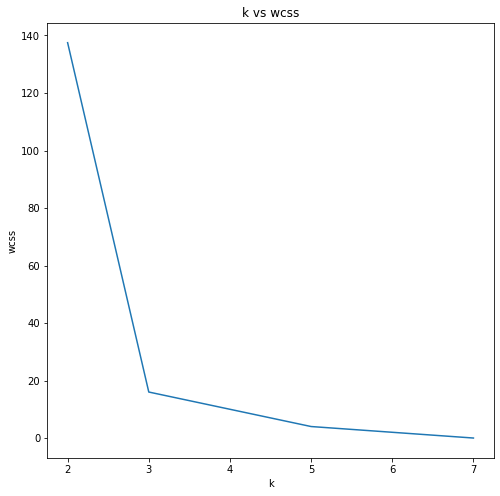

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
plt.plot([2,3,4,5,6,7],wcss)
plt.title("k vs wcss")
plt.xlabel("k")
plt.ylabel("wcss")

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_score(X,label)

0.43630092057240805

In [54]:
import pandas as pd
pd.read_csv("Mall_Customers.csv")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
1. import datset
2. k=3,4,5,6,7
3. wcss/insertia_
4. plot it and find optimal k value
5. sihloutee score and dunn index                   on annual income and spending score

### Hierarchical Clustering       
2 methods:   Agglomerative Clustering (bottom to up approach) , Divisive Clustering (up to bottom approach)

In [43]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0],[6,8],[5,2],[6,9],[3,7],[12,5],[11,5],[10,5],[10,6]])

In [44]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [ 4,  2],
       [ 4,  4],
       [ 4,  0],
       [ 6,  8],
       [ 5,  2],
       [ 6,  9],
       [ 3,  7],
       [12,  5],
       [11,  5],
       [10,  5],
       [10,  6]])

In [46]:
clustering = AgglomerativeClustering(n_clusters=4)

In [47]:
clustering.fit(X)


AgglomerativeClustering(n_clusters=4)

In [48]:
clustering.labels_

array([1, 1, 1, 3, 0, 3, 0, 3, 0, 0, 2, 2, 2, 2], dtype=int64)

In [49]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [50]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [55]:
import pandas as pd
df=pd.read_csv("Mall_Customers.csv")


In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
data=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [58]:
X=np.array(data)

In [59]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [60]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [62]:
model = model.fit(X)

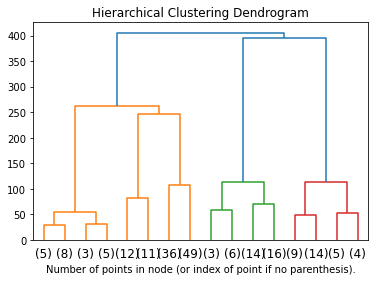

In [63]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# DBSCAN

In [72]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80],[8,12],[4,2],[5,8],[8,12]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [73]:
clustering.components_

array([[ 1,  2],
       [ 2,  2],
       [ 2,  3],
       [ 8,  7],
       [ 8,  8],
       [ 8, 12],
       [ 4,  2],
       [ 5,  8],
       [ 8, 12]])

In [74]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1,  2,  0,  1,  2], dtype=int64)

In [75]:
clustering.core_sample_indices_

array([0, 1, 2, 3, 4, 6, 7, 8, 9], dtype=int64)

In [76]:
clustering.metric

'euclidean'

In [77]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 1


In [78]:
# plotting result of DBSCAN

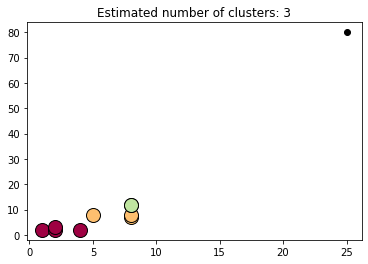

In [79]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()